<a href="https://colab.research.google.com/github/PaulToronto/Stanford-Andrew-Ng-Machine-Learning-Specialization/blob/main/Logistic_Regression_with_Sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression with `sympy`

## Imports

In [1]:
import sympy as sym
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from math import ceil

## Functions

In [2]:
def sigmoid(z, clip=False):
    """
    Compute the sigmoid of z

    Parameters
    ----------
    z : array_like
        A scalar or numpy array of any size.

    Returns
    -------
     g : array_like
         sigmoid(z)
    """
    if clip:
        z = np.clip( z, -500, 500 )           # protect against overflow
    g = 1.0 / (1.0 + sym.exp(-z))

    return g

In [3]:
def log_1pexp(x, maximum=20):
    ''' approximate log(1+exp^x)
        https://stats.stackexchange.com/questions/475589/numerical-computation-of-cross-entropy-in-practice
    Args:
    x   : (ndarray Shape (n,1) or (n,)  input
    out : (ndarray Shape matches x      output ~= np.log(1+exp(x))
    '''

    out  = np.zeros_like(x,dtype=float)
    i    = x <= maximum
    ni   = np.logical_not(i)

    out[i]  = np.log(1 + np.exp(x[i]))
    out[ni] = x[ni]
    return out

In [4]:
def log_1pexp_sym(x, maximum=20):
    ''' approximate log(1+exp^x)
        https://stats.stackexchange.com/questions/475589/numerical-computation-of-cross-entropy-in-practice
    Args:
    x   : (ndarray Shape (n,1) or (n,)  input
    out : (ndarray Shape matches x      output ~= np.log(1+exp(x))
    '''

    x = np.array(x, dtype='float64') # because it is a sympy Matrix

    out  = np.zeros_like(x,dtype=float)
    i    = x <= maximum
    ni   = np.logical_not(i)

    out[i]  = np.log(1 + np.exp(x[i]))
    out[ni] = x[ni]
    out = sym.Matrix(out)
    return out

In [5]:
def safe_cost(X, y, w, b):
    m = X.shape[0]
    z = X @ w + b
    cost = -(y * z) + log_1pexp(z)
    cost = np.sum(cost) / m
    return cost

In [6]:
def safe_cost_sym(X, y, w, b):
    X = np.array(X, dtype='float64')
    y = np.array(y, dtype='float64')
    w = np.array(w, dtype='float64')
    b = np.array(b, dtype='float64')
    cost = safe_cost(X, y, w, b)
    return cost

## Symbols

In [7]:
# training set data
x11, x12 = sym.symbols('x_{11} x_{12}')
x21, x22 = sym.symbols('x_{21} x_{22}')
x31, x32 = sym.symbols('x_{31} x_{32}')
x41, x42 = sym.symbols('x_{41} x_{42}')
x51, x52 = sym.symbols('x_{51} x_{52}')
x61, x62 = sym.symbols('x_{61} x_{62}')

# weights and bias
w1, w2, b = sym.symbols('w_1 w_2 b')
w = sym.Matrix([w1, w2])

# weight for simple logistic regression
m = sym.symbols('m')

## Toy Datasets

In [8]:
data1 = pd.DataFrame({
    'feature1': [x11, x21, x31, x41, x51, x61],
    'target': [0, 0, 0, 1, 1, 1]
})

x_train1 = sym.Matrix(data1.drop('target', axis=1))
y_train1 = sym.Matrix(data1['target'])

In [9]:
data2 = pd.DataFrame({
    'feature1': [x11, x21, x31, x41, x51, x61],
    'feature2': [x12, x22, x32, x42, x52, x62],
    'target': [0, 0, 0, 1, 1, 1]
})

x_train2 = sym.Matrix(data2.drop('target', axis=1))
y_train2 = sym.Matrix(data2['target'])

In [10]:
data3 = pd.DataFrame({
        'x': [0, 1, 2, 3, 4, 5],
        'y': [0, 0, 0, 1, 1, 1]
})

x_train3 = sym.Matrix(data3.drop('y', axis=1).values)
y_train3 = sym.Matrix(data3['y'].values)

pos3 = np.array(y_train3) == 1
neg3 = np.array(y_train3) == 0

In [11]:
data4 = pd.DataFrame({
    'x1': [0.5, 1, 1.5, 3, 2, 1],
    'x2': [1.5, 1, 0.5, 0.5, 2, 2.5],
    'y': [0, 0, 0, 1, 1, 1]
})

x_train4 = sym.Matrix(data4.drop('y', axis=1).values)
y_train4 = sym.Matrix(data4['y'].values)

pos4 = np.array(y_train4) == 1
neg4 = np.array(y_train4) == 0

## Prediction

$$
f_{\vec{w},b}\left(\vec{x}\right) = \frac{1}{1 + e^{-(\vec{w}\cdot\vec{x} + b)}}
$$

In [12]:
def f_wb(X, w, b):
    m, n = X.shape
    w = sym.Matrix([w]) # ensure w is a matrix
    pred = X @ w + b * sym.ones(m, 1)
    pred = pred.applyfunc(sigmoid)
    return pred

In [13]:
f_wb(x_train1, m, b)

Matrix([
[1.0/(exp(-b - m*x_{11}) + 1.0)],
[1.0/(exp(-b - m*x_{21}) + 1.0)],
[1.0/(exp(-b - m*x_{31}) + 1.0)],
[1.0/(exp(-b - m*x_{41}) + 1.0)],
[1.0/(exp(-b - m*x_{51}) + 1.0)],
[1.0/(exp(-b - m*x_{61}) + 1.0)]])

In [14]:
f_wb(x_train1[0,:], m, b)

Matrix([[1.0/(exp(-b - m*x_{11}) + 1.0)]])

In [15]:
f_wb(x_train2, w, b)

Matrix([
[1.0/(exp(-b - w_1*x_{11} - w_2*x_{12}) + 1.0)],
[1.0/(exp(-b - w_1*x_{21} - w_2*x_{22}) + 1.0)],
[1.0/(exp(-b - w_1*x_{31} - w_2*x_{32}) + 1.0)],
[1.0/(exp(-b - w_1*x_{41} - w_2*x_{42}) + 1.0)],
[1.0/(exp(-b - w_1*x_{51} - w_2*x_{52}) + 1.0)],
[1.0/(exp(-b - w_1*x_{61} - w_2*x_{62}) + 1.0)]])

In [16]:
x_train3

Matrix([
[0],
[1],
[2],
[3],
[4],
[5]])

In [17]:
f_wb(x_train3, m, b)

Matrix([
[      1.0/(1.0 + exp(-b))],
[  1.0/(exp(-b - m) + 1.0)],
[1.0/(exp(-b - 2*m) + 1.0)],
[1.0/(exp(-b - 3*m) + 1.0)],
[1.0/(exp(-b - 4*m) + 1.0)],
[1.0/(exp(-b - 5*m) + 1.0)]])

In [18]:
f_wb(x_train4, w, b)

Matrix([
[1.0/(exp(-b - 0.5*w_1 - 1.5*w_2) + 1.0)],
[1.0/(exp(-b - 1.0*w_1 - 1.0*w_2) + 1.0)],
[1.0/(exp(-b - 1.5*w_1 - 0.5*w_2) + 1.0)],
[1.0/(exp(-b - 3.0*w_1 - 0.5*w_2) + 1.0)],
[1.0/(exp(-b - 2.0*w_1 - 2.0*w_2) + 1.0)],
[1.0/(exp(-b - 1.0*w_1 - 2.5*w_2) + 1.0)]])

## Cost Function

$$
J\left(\vec{w},b\right) = -\frac{1}{m}\sum_{i=1}^{m}\left(y^{(i)}\log{\left(f_{\vec{w},b}\left(\vec{x}^{(i)}\right)\right)} + \left(1 - y^{(i)}\right)\log{\left(1 - f_{\vec{w},b}\left(\vec{x}^{(i)}\right)\right)}\right)
$$

In [19]:
def compute_cost_loop(X, y, w, b):
    m = X.shape[0]

    cost = 0.0
    for i in range(m):
        f_wb_i = f_wb(X[i,:], w, b)
        cost += -y[i] * sym.log(f_wb_i[0]) - (1 - y[i]) * sym.log(1 - f_wb_i[0])

    cost = cost / m

    return cost

In [20]:
def compute_cost(X, y, w, b, safe=False):
    m = X.shape[0]

    if safe:
        cost = safe_cost_sym(X, y, w, b)
    else:
        f = f_wb(X, w, b)
        cost = sym.Rational(1, m) * ((-y.T @ f.applyfunc(sym.log)) -
        (sym.ones(m, 1) - y).T  @ (sym.ones(m, 1) - f).applyfunc(sym.log))
        cost = cost[0, 0]

    return cost

In [21]:
def compute_cost_safe(X, y, w, b):
    return compute_cost(X, y, w, b, safe=True)

In [22]:
compute_cost_loop(x_train1, y_train1, m, b)

-log(1 - 1.0/(exp(-b - m*x_{11}) + 1.0))/6 - log(1 - 1.0/(exp(-b - m*x_{21}) + 1.0))/6 - log(1 - 1.0/(exp(-b - m*x_{31}) + 1.0))/6 - log(1.0/(exp(-b - m*x_{41}) + 1.0))/6 - log(1.0/(exp(-b - m*x_{51}) + 1.0))/6 - log(1.0/(exp(-b - m*x_{61}) + 1.0))/6

In [23]:
compute_cost(x_train1, y_train1, m, b)

-log(1 - 1.0/(exp(-b - m*x_{11}) + 1.0))/6 - log(1 - 1.0/(exp(-b - m*x_{21}) + 1.0))/6 - log(1 - 1.0/(exp(-b - m*x_{31}) + 1.0))/6 - log(1.0/(exp(-b - m*x_{41}) + 1.0))/6 - log(1.0/(exp(-b - m*x_{51}) + 1.0))/6 - log(1.0/(exp(-b - m*x_{61}) + 1.0))/6

In [24]:
compute_cost_loop(x_train2, y_train2, w, b)

-log(1 - 1.0/(exp(-b - w_1*x_{11} - w_2*x_{12}) + 1.0))/6 - log(1 - 1.0/(exp(-b - w_1*x_{21} - w_2*x_{22}) + 1.0))/6 - log(1 - 1.0/(exp(-b - w_1*x_{31} - w_2*x_{32}) + 1.0))/6 - log(1.0/(exp(-b - w_1*x_{41} - w_2*x_{42}) + 1.0))/6 - log(1.0/(exp(-b - w_1*x_{51} - w_2*x_{52}) + 1.0))/6 - log(1.0/(exp(-b - w_1*x_{61} - w_2*x_{62}) + 1.0))/6

In [25]:
compute_cost(x_train2, y_train2, w, b)

-log(1 - 1.0/(exp(-b - w_1*x_{11} - w_2*x_{12}) + 1.0))/6 - log(1 - 1.0/(exp(-b - w_1*x_{21} - w_2*x_{22}) + 1.0))/6 - log(1 - 1.0/(exp(-b - w_1*x_{31} - w_2*x_{32}) + 1.0))/6 - log(1.0/(exp(-b - w_1*x_{41} - w_2*x_{42}) + 1.0))/6 - log(1.0/(exp(-b - w_1*x_{51} - w_2*x_{52}) + 1.0))/6 - log(1.0/(exp(-b - w_1*x_{61} - w_2*x_{62}) + 1.0))/6

In [26]:
compute_cost_loop(x_train3, y_train3, m, b)

-log(1 - 1.0/(1.0 + exp(-b)))/6 - log(1 - 1.0/(exp(-b - 2*m) + 1.0))/6 - log(1 - 1.0/(exp(-b - m) + 1.0))/6 - log(1.0/(exp(-b - 5*m) + 1.0))/6 - log(1.0/(exp(-b - 4*m) + 1.0))/6 - log(1.0/(exp(-b - 3*m) + 1.0))/6

In [27]:
compute_cost(x_train3, y_train3, m, b)

-log(1 - 1.0/(1.0 + exp(-b)))/6 - log(1 - 1.0/(exp(-b - 2*m) + 1.0))/6 - log(1 - 1.0/(exp(-b - m) + 1.0))/6 - log(1.0/(exp(-b - 5*m) + 1.0))/6 - log(1.0/(exp(-b - 4*m) + 1.0))/6 - log(1.0/(exp(-b - 3*m) + 1.0))/6

In [28]:
compute_cost_loop(x_train4, y_train4, sym.Matrix([1, 1]), -3)

0.366866786405517

In [29]:
compute_cost(x_train4, y_train4, sym.Matrix([1, 1]), -3)

0.366866786405517

In [30]:
compute_cost(x_train4, y_train4, sym.Matrix([1, 1]), -3, safe=True)

0.3668667864055175

In [31]:
compute_cost_loop(x_train4, y_train4, sym.Matrix([1, 1]), -4)

0.503680863674846

In [32]:
compute_cost(x_train4, y_train4, sym.Matrix([1, 1]), -4)

0.503680863674846

In [33]:
compute_cost(x_train4, y_train4, sym.Matrix([1, 1]), -4, safe=True)

0.5036808636748461

## The Gradient

$$
\begin{align}
\frac{\partial}{\partial w_j} &= \frac{1}{m}\sum_{i=1}^{m}\left(f_{\vec{w},b}\left(\vec{x}^{(i)}\right) - y^{(i)}\right)x_j^{(i)} \\
\frac{\partial}{\partial b} &= \frac{1}{m}\sum_{i=1}^{m}\left(f_{\vec{w},b}\left(\vec{x}^{(i)}\right) - y^{(i)}\right)
\end{align}
$$

In [34]:
def compute_gradient_loop(X, y, w, b):
    m, n = X.shape
    dj_dw = sym.zeros(n, 1)
    dj_db = 0.0

    for i in range(m):
        err = f_wb(X[i,:], w, b)[0] - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + (err * X[i, j])
        dj_db = dj_db + err

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

In [35]:
def compute_gradient(X, y, w, b):
    m = X.shape[0]

    err = f_wb(X, w, b) - y

    dj_dw = sym.Rational(1, m) * (X.T @ err)
    dj_db = sym.Rational(1, m) * np.sum(err)

    return dj_db, dj_dw

In [36]:
dj_db, dj_dw = compute_gradient_loop(x_train1, y_train1, m, b)

display(dj_db)
display(dj_dw)

-1/2 + 0.166666666666667/(exp(-b - m*x_{61}) + 1.0) + 0.166666666666667/(exp(-b - m*x_{51}) + 1.0) + 0.166666666666667/(exp(-b - m*x_{41}) + 1.0) + 0.166666666666667/(exp(-b - m*x_{31}) + 1.0) + 0.166666666666667/(exp(-b - m*x_{21}) + 1.0) + 0.166666666666667/(exp(-b - m*x_{11}) + 1.0)

Matrix([[0.166666666666667*x_{11}/(exp(-b - m*x_{11}) + 1.0) + 0.166666666666667*x_{21}/(exp(-b - m*x_{21}) + 1.0) + 0.166666666666667*x_{31}/(exp(-b - m*x_{31}) + 1.0) + x_{41}*(-1 + 1.0/(exp(-b - m*x_{41}) + 1.0))/6 + x_{51}*(-1 + 1.0/(exp(-b - m*x_{51}) + 1.0))/6 + x_{61}*(-1 + 1.0/(exp(-b - m*x_{61}) + 1.0))/6]])

In [37]:
dj_db, dj_dw = compute_gradient(x_train1, y_train1, m, b)

display(dj_db)
display(dj_dw)

-1/2 + 0.166666666666667/(exp(-b - m*x_{61}) + 1.0) + 0.166666666666667/(exp(-b - m*x_{51}) + 1.0) + 0.166666666666667/(exp(-b - m*x_{41}) + 1.0) + 0.166666666666667/(exp(-b - m*x_{31}) + 1.0) + 0.166666666666667/(exp(-b - m*x_{21}) + 1.0) + 0.166666666666667/(exp(-b - m*x_{11}) + 1.0)

Matrix([[0.166666666666667*x_{11}/(exp(-b - m*x_{11}) + 1.0) + 0.166666666666667*x_{21}/(exp(-b - m*x_{21}) + 1.0) + 0.166666666666667*x_{31}/(exp(-b - m*x_{31}) + 1.0) + x_{41}*(-1 + 1.0/(exp(-b - m*x_{41}) + 1.0))/6 + x_{51}*(-1 + 1.0/(exp(-b - m*x_{51}) + 1.0))/6 + x_{61}*(-1 + 1.0/(exp(-b - m*x_{61}) + 1.0))/6]])

In [38]:
dj_db, dj_dw = compute_gradient_loop(x_train2, y_train2, w, b)

display(dj_db)
display(dj_dw)

-1/2 + 0.166666666666667/(exp(-b - w_1*x_{61} - w_2*x_{62}) + 1.0) + 0.166666666666667/(exp(-b - w_1*x_{51} - w_2*x_{52}) + 1.0) + 0.166666666666667/(exp(-b - w_1*x_{41} - w_2*x_{42}) + 1.0) + 0.166666666666667/(exp(-b - w_1*x_{31} - w_2*x_{32}) + 1.0) + 0.166666666666667/(exp(-b - w_1*x_{21} - w_2*x_{22}) + 1.0) + 0.166666666666667/(exp(-b - w_1*x_{11} - w_2*x_{12}) + 1.0)

Matrix([
[0.166666666666667*x_{11}/(exp(-b - w_1*x_{11} - w_2*x_{12}) + 1.0) + 0.166666666666667*x_{21}/(exp(-b - w_1*x_{21} - w_2*x_{22}) + 1.0) + 0.166666666666667*x_{31}/(exp(-b - w_1*x_{31} - w_2*x_{32}) + 1.0) + x_{41}*(-1 + 1.0/(exp(-b - w_1*x_{41} - w_2*x_{42}) + 1.0))/6 + x_{51}*(-1 + 1.0/(exp(-b - w_1*x_{51} - w_2*x_{52}) + 1.0))/6 + x_{61}*(-1 + 1.0/(exp(-b - w_1*x_{61} - w_2*x_{62}) + 1.0))/6],
[0.166666666666667*x_{12}/(exp(-b - w_1*x_{11} - w_2*x_{12}) + 1.0) + 0.166666666666667*x_{22}/(exp(-b - w_1*x_{21} - w_2*x_{22}) + 1.0) + 0.166666666666667*x_{32}/(exp(-b - w_1*x_{31} - w_2*x_{32}) + 1.0) + x_{42}*(-1 + 1.0/(exp(-b - w_1*x_{41} - w_2*x_{42}) + 1.0))/6 + x_{52}*(-1 + 1.0/(exp(-b - w_1*x_{51} - w_2*x_{52}) + 1.0))/6 + x_{62}*(-1 + 1.0/(exp(-b - w_1*x_{61} - w_2*x_{62}) + 1.0))/6]])

In [39]:
dj_db, dj_dw = compute_gradient(x_train2, y_train2, w, b)

display(dj_db)
display(dj_dw)

-1/2 + 0.166666666666667/(exp(-b - w_1*x_{61} - w_2*x_{62}) + 1.0) + 0.166666666666667/(exp(-b - w_1*x_{51} - w_2*x_{52}) + 1.0) + 0.166666666666667/(exp(-b - w_1*x_{41} - w_2*x_{42}) + 1.0) + 0.166666666666667/(exp(-b - w_1*x_{31} - w_2*x_{32}) + 1.0) + 0.166666666666667/(exp(-b - w_1*x_{21} - w_2*x_{22}) + 1.0) + 0.166666666666667/(exp(-b - w_1*x_{11} - w_2*x_{12}) + 1.0)

Matrix([
[0.166666666666667*x_{11}/(exp(-b - w_1*x_{11} - w_2*x_{12}) + 1.0) + 0.166666666666667*x_{21}/(exp(-b - w_1*x_{21} - w_2*x_{22}) + 1.0) + 0.166666666666667*x_{31}/(exp(-b - w_1*x_{31} - w_2*x_{32}) + 1.0) + x_{41}*(-1 + 1.0/(exp(-b - w_1*x_{41} - w_2*x_{42}) + 1.0))/6 + x_{51}*(-1 + 1.0/(exp(-b - w_1*x_{51} - w_2*x_{52}) + 1.0))/6 + x_{61}*(-1 + 1.0/(exp(-b - w_1*x_{61} - w_2*x_{62}) + 1.0))/6],
[0.166666666666667*x_{12}/(exp(-b - w_1*x_{11} - w_2*x_{12}) + 1.0) + 0.166666666666667*x_{22}/(exp(-b - w_1*x_{21} - w_2*x_{22}) + 1.0) + 0.166666666666667*x_{32}/(exp(-b - w_1*x_{31} - w_2*x_{32}) + 1.0) + x_{42}*(-1 + 1.0/(exp(-b - w_1*x_{41} - w_2*x_{42}) + 1.0))/6 + x_{52}*(-1 + 1.0/(exp(-b - w_1*x_{51} - w_2*x_{52}) + 1.0))/6 + x_{62}*(-1 + 1.0/(exp(-b - w_1*x_{61} - w_2*x_{62}) + 1.0))/6]])

In [40]:
dj_db, dj_dw = compute_gradient_loop(x_train3, y_train3, m, b)

display(dj_db)
display(dj_dw)

-1/2 + 0.166666666666667/(exp(-b - m) + 1.0) + 0.166666666666667/(exp(-b - 2*m) + 1.0) + 0.166666666666667/(exp(-b - 3*m) + 1.0) + 0.166666666666667/(exp(-b - 4*m) + 1.0) + 0.166666666666667/(exp(-b - 5*m) + 1.0) + 0.166666666666667/(1.0 + exp(-b))

Matrix([[-2 + 0.166666666666667/(exp(-b - m) + 1.0) + 0.333333333333333/(exp(-b - 2*m) + 1.0) + 0.5/(exp(-b - 3*m) + 1.0) + 0.666666666666667/(exp(-b - 4*m) + 1.0) + 0.833333333333333/(exp(-b - 5*m) + 1.0)]])

In [41]:
dj_db, dj_dw = compute_gradient(x_train3, y_train3, m, b)

display(dj_db)
display(dj_dw)

-1/2 + 0.166666666666667/(exp(-b - m) + 1.0) + 0.166666666666667/(exp(-b - 2*m) + 1.0) + 0.166666666666667/(exp(-b - 3*m) + 1.0) + 0.166666666666667/(exp(-b - 4*m) + 1.0) + 0.166666666666667/(exp(-b - 5*m) + 1.0) + 0.166666666666667/(1.0 + exp(-b))

Matrix([[-2 + 0.166666666666667/(exp(-b - m) + 1.0) + 0.333333333333333/(exp(-b - 2*m) + 1.0) + 0.5/(exp(-b - 3*m) + 1.0) + 0.666666666666667/(exp(-b - 4*m) + 1.0) + 0.833333333333333/(exp(-b - 5*m) + 1.0)]])

In [42]:
dj_db, dj_dw = compute_gradient_loop(x_train4, y_train4, sym.Matrix([2.0, 3.0]), 1.0)

display(dj_db)
display(dj_dw)

0.498618065463286

Matrix([
[0.498333393278696],
[0.498839429839967]])

In [43]:
dj_db, dj_dw = compute_gradient(x_train4, y_train4, sym.Matrix([2.0, 3.0]), 1.0)

display(dj_db)
display(dj_dw)

0.498618065463286

Matrix([
[0.498333393278696],
[0.498839429839967]])

## Gradient Descent

repeat {
$$
\begin{align}
w_j &= w_j - \alpha \frac{\partial}{\partial w_j}J\left(\vec{w}, b\right) \\
b &= b - \alpha \frac{\partial}{\partial b}J\left(\vec{w}, b\right)
\end{align}
$$
}

In [44]:
def gradient_descent(X, y, w, b, f_cost, f_gradient, alpha, num_iters):
    w = sym.Matrix([w])
    history = {'cost':[],
               'w': [],
               'b': []}

    for i in range(num_iters):
        dj_db, dj_dw = f_gradient(X, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        history['cost'].append(f_cost(X, y, w, b))
        history['w'].append(w)
        history['b'].append(b)

        # print cost
        if i % ceil(num_iters / 10) == 0:
            print(f'Iteration {i:4d}: Cost {history["cost"][-1]:8.4f}')

    return w, b, history

In [45]:
w_out, b_out, hist = gradient_descent(x_train4,
                                      y_train4,
                                      w = sym.Matrix([0, 0]),
                                      b = 0.0,
                                      f_cost = compute_cost,
                                      f_gradient = compute_gradient,
                                      alpha=0.1,
                                      num_iters=10_000)

Iteration    0: Cost   0.6846
Iteration 1000: Cost   0.1591
Iteration 2000: Cost   0.0846
Iteration 3000: Cost   0.0571
Iteration 4000: Cost   0.0429
Iteration 5000: Cost   0.0343
Iteration 6000: Cost   0.0286
Iteration 7000: Cost   0.0245
Iteration 8000: Cost   0.0214
Iteration 9000: Cost   0.0190


In [46]:
w_out, b_out, hist = gradient_descent(x_train4,
                                      y_train4,
                                      w = sym.Matrix([0, 0]),
                                      b = 0.0,
                                      f_cost = compute_cost_safe,
                                      f_gradient = compute_gradient,
                                      alpha=0.1,
                                      num_iters=10_000)

Iteration    0: Cost   0.6846
Iteration 1000: Cost   0.1591
Iteration 2000: Cost   0.0846
Iteration 3000: Cost   0.0571
Iteration 4000: Cost   0.0429
Iteration 5000: Cost   0.0343
Iteration 6000: Cost   0.0286
Iteration 7000: Cost   0.0245
Iteration 8000: Cost   0.0214
Iteration 9000: Cost   0.0190


In [47]:
display(w_out)
display(b_out)

Matrix([
[5.28123029178055],
[5.07815607515983]])

-14.2224099820198

## Plotting Gradient Descent

In [48]:
w_out, b_out, hist = gradient_descent(x_train3,
                                      y_train3,
                                      w = 0.0,
                                      b = 0.0,
                                      f_cost = compute_cost_safe,
                                      f_gradient = compute_gradient,
                                      alpha=0.1,
                                      num_iters=100_000)

Iteration    0: Cost   0.6433
Iteration 10000: Cost   0.0254
Iteration 20000: Cost   0.0138
Iteration 30000: Cost   0.0094
Iteration 40000: Cost   0.0072
Iteration 50000: Cost   0.0058
Iteration 60000: Cost   0.0048
Iteration 70000: Cost   0.0041
Iteration 80000: Cost   0.0036
Iteration 90000: Cost   0.0032


In [49]:
display(w_out)
display(b_out)

Matrix([[9.50512428150334]])

-23.5871122809169

In [50]:
# smaller history
short_hist =  {'cost':[],
               'w': [],
               'b': []}
for i in range(len(hist['cost'])):
    if i % ceil(len(hist['cost']) / 10) == 0:
        short_hist['cost'].append(hist['cost'][i])
        short_hist['w'].append(hist['w'][i][0])
        short_hist['b'].append(hist['b'][i])
short_hist['cost'].append(hist['cost'][-1])
short_hist['w'].append(w_out[0])
short_hist['b'].append(b_out)

short_hist['cost'] = np.array(short_hist['cost'], dtype='double')
short_hist['w'] = np.array(short_hist['w'], dtype='double')
short_hist['b'] = np.array(short_hist['b'], dtype='double')

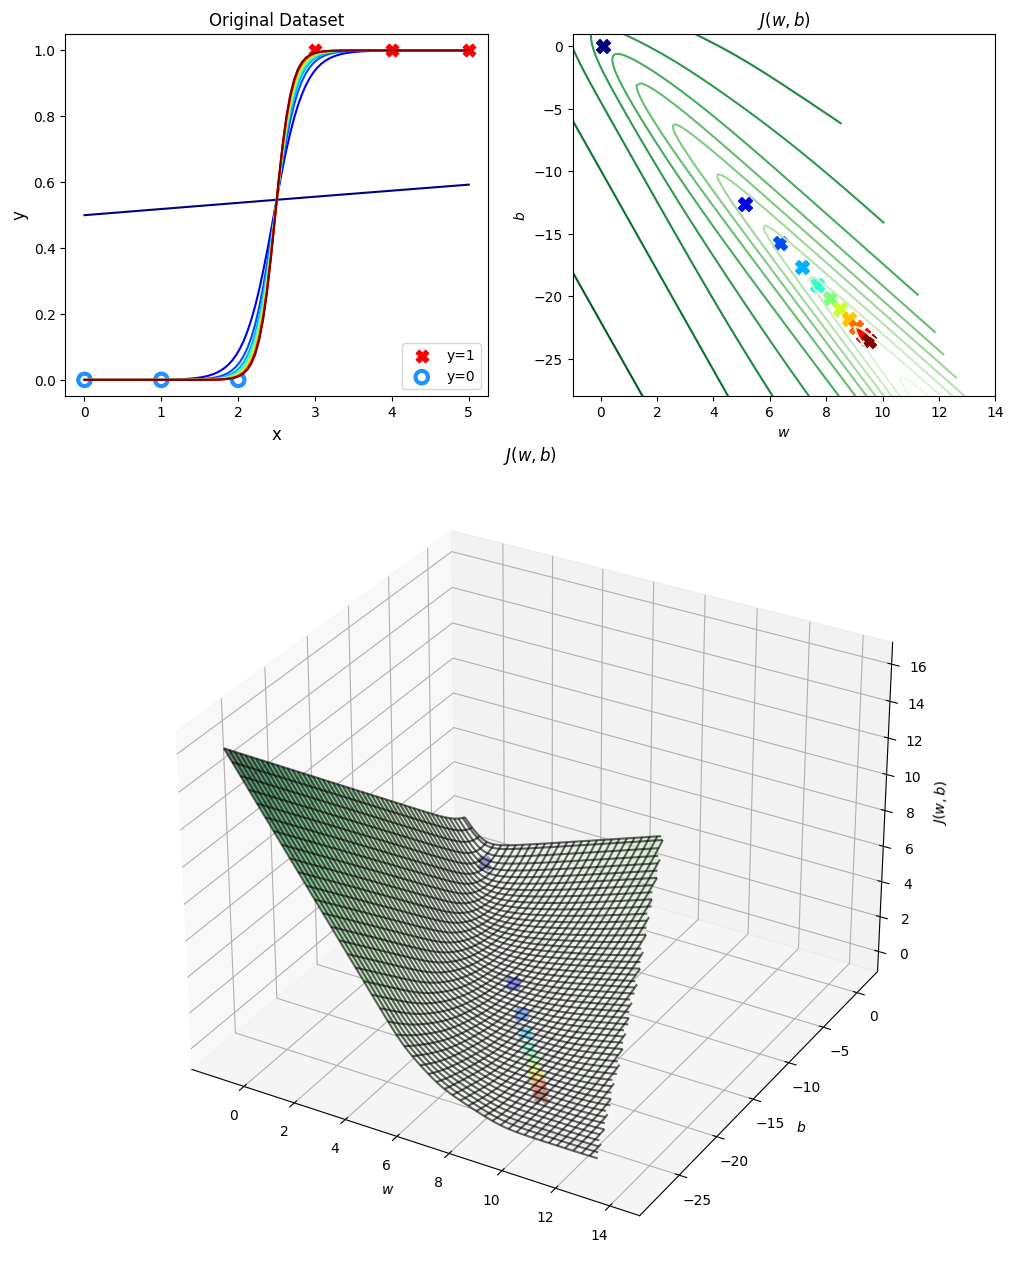

In [51]:
fig = plt.figure(figsize=(12, 16))
gs = GridSpec(3, 2)

colors = plt.cm.jet(np.linspace(0, 1, 11))

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1:,:], projection='3d')

# plot the data
x_train = np.array(x_train3, dtype='double')
y_train = np.array(y_train3, dtype='double')
ax1.scatter(x_train[pos3], y_train[pos3],
              marker='X', s=80, c='red', label='y=1')
ax1.scatter(x_train[neg3], y_train[neg3],
              marker='o', s=80, facecolors='none',
              edgecolor='dodgerblue', lw=3, label='y=0')
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.set_title('Original Dataset')
ax1.legend(loc='lower right')

ax2.set_title('$J(w,b)$')
ax2.set_xlabel('$w$')
ax2.set_ylabel('$b$')

ax3.set_title('$J(w,b)$')
ax3.set_xlabel('$w$')
ax3.set_ylabel('$b$')
ax3.set_zlabel('$J(w,b)$')

# meshgrid4
w_space = np.linspace(-1, 14, 100)
b_space = np.linspace(-28, 1, 100)
W_space, B_space = np.meshgrid(w_space, b_space)
Z_cost = np.zeros_like(W_space)

for i in range(W_space.shape[0]):
    for j in range(W_space.shape[1]):
        Z_cost[i, j] = compute_cost(x_train3, y_train3, W_space[i, j], B_space[i, j])
        if Z_cost[i, j] == 0:
               Z_cost[i, j] = 1e-9

# contour plot
ax2.contour(W_space, B_space, np.log(Z_cost), levels=12, cmap='Greens')

# 3D surface plot
ax3.plot_surface(W_space, B_space, Z_cost, cmap='Greens', alpha=0.6)
ax3.plot_wireframe(W_space, B_space, Z_cost, color='k', alpha=0.6)


# plot the predictions and cost
# domain makes the sigmoid smoother
domain = np.linspace(x_train.min(), x_train.max(), 100)
for i, w in enumerate(short_hist['w']):
    ax1.plot(domain,
             np.array(f_wb(domain.reshape(-1, 1), w, short_hist['b'][i])).flatten(),
             color=colors[i])
    ax2.scatter(w, short_hist['b'][i], s=100, marker='X', color=colors[i])
    ax3.scatter(w, short_hist['b'][i], s=100, marker='X', color=colors[i])

## Plot Gradient Descent: `safe=True`

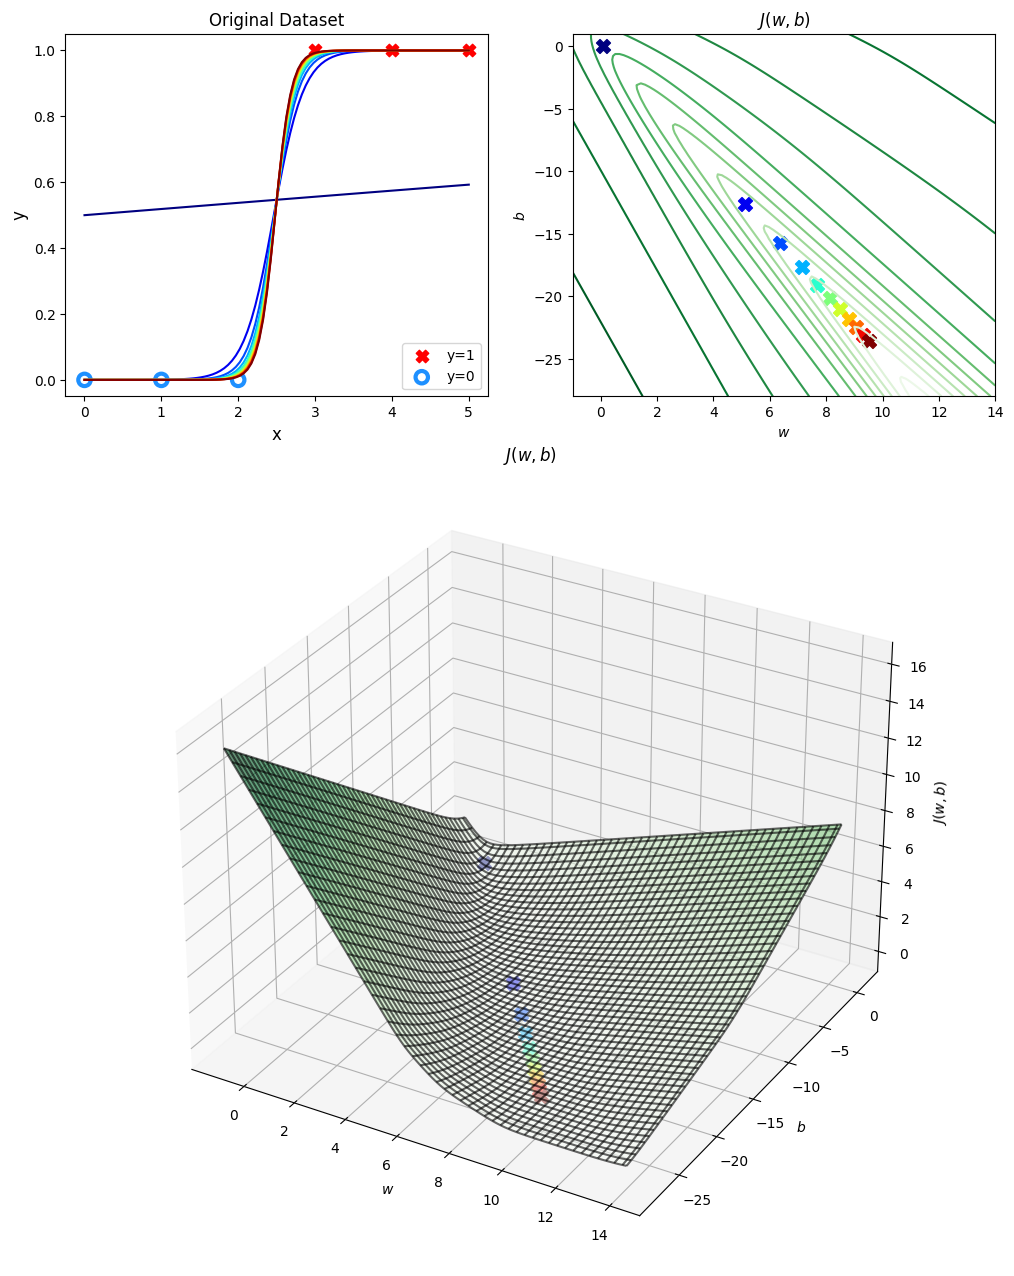

In [52]:
fig = plt.figure(figsize=(12, 16))
gs = GridSpec(3, 2)

colors = plt.cm.jet(np.linspace(0, 1, 11))

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1:,:], projection='3d')

# plot the data
x_train = np.array(x_train3, dtype='double')
y_train = np.array(y_train3, dtype='double')
ax1.scatter(x_train[pos3], y_train[pos3],
              marker='X', s=80, c='red', label='y=1')
ax1.scatter(x_train[neg3], y_train[neg3],
              marker='o', s=80, facecolors='none',
              edgecolor='dodgerblue', lw=3, label='y=0')
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.set_title('Original Dataset')
ax1.legend(loc='lower right')

ax2.set_title('$J(w,b)$')
ax2.set_xlabel('$w$')
ax2.set_ylabel('$b$')

ax3.set_title('$J(w,b)$')
ax3.set_xlabel('$w$')
ax3.set_ylabel('$b$')
ax3.set_zlabel('$J(w,b)$')

# meshgrid4
w_space = np.linspace(-1, 14, 100)
b_space = np.linspace(-28, 1, 100)
W_space, B_space = np.meshgrid(w_space, b_space)
Z_cost = np.zeros_like(W_space)

for i in range(W_space.shape[0]):
    for j in range(W_space.shape[1]):
        Z_cost[i, j] = compute_cost(x_train3,
                                    y_train3,
                                    sym.Matrix([W_space[i, j]]),
                                    B_space[i, j], safe=True)
        if Z_cost[i, j] == 0:
               Z_cost[i, j] = 1e-9

# contour plot
ax2.contour(W_space, B_space, np.log(Z_cost), levels=12, cmap='Greens')

# 3D surface plot
ax3.plot_surface(W_space, B_space, Z_cost, cmap='Greens', alpha=0.6)
ax3.plot_wireframe(W_space, B_space, Z_cost, color='k', alpha=0.6)


# plot the predictions and cost
# domain makes the sigmoid smoother
domain = np.linspace(x_train.min(), x_train.max(), 100)
for i, w in enumerate(short_hist['w']):
    ax1.plot(domain,
             np.array(f_wb(domain.reshape(-1, 1), w, short_hist['b'][i])).flatten(),
             color=colors[i])
    ax2.scatter(w, short_hist['b'][i], s=100, marker='X', color=colors[i])
    ax3.scatter(w, short_hist['b'][i], s=100, marker='X', color=colors[i])